In [1]:
!pip install seaborn

In [2]:
import numpy as np
from pathlib import Path
import tensorflow as tf
import sys
import os
from datetime import datetime

from sklearn.metrics import classification_report
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import (
    auc,
    average_precision_score,
    precision_recall_curve,
    roc_curve,
)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm import tqdm
from scipy.io import loadmat
import random
import math
from numpy import genfromtxt
import resampy
import matplotlib.pyplot as plt
import seaborn as sns

2022-10-28 01:18:41.929437: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
def getAllMats(path = "/data/stg60/newchaos/data/mats/synthetic/folder003/", sample = None, filter_required = True, L = 128, timetopredict = 1.96, samplingrate = 100):
    maxsize = int(timetopredict*samplingrate) + L*4 + 1
    data = sorted(Path(path).glob("milton*.mat"))
    if sample:
        data = random.sample(data, sample)
    if filter_required:
        data = list(filter(lambda x:loadmat(x)['phiv'].max()>20 and loadmat(x)['phiv'].size>maxsize, data))
        print(data)
    return data

In [4]:
sim_path_list = getAllMats(sample=None)
print("The sampled sim_path_list is ", len(sim_path_list))

[PosixPath('/data/stg60/newchaos/data/mats/synthetic/folder003/milton_sim_0000000001.mat'), PosixPath('/data/stg60/newchaos/data/mats/synthetic/folder003/milton_sim_0000000002.mat'), PosixPath('/data/stg60/newchaos/data/mats/synthetic/folder003/milton_sim_0000000003.mat'), PosixPath('/data/stg60/newchaos/data/mats/synthetic/folder003/milton_sim_0000000005.mat'), PosixPath('/data/stg60/newchaos/data/mats/synthetic/folder003/milton_sim_0000000006.mat'), PosixPath('/data/stg60/newchaos/data/mats/synthetic/folder003/milton_sim_0000000008.mat'), PosixPath('/data/stg60/newchaos/data/mats/synthetic/folder003/milton_sim_0000000009.mat'), PosixPath('/data/stg60/newchaos/data/mats/synthetic/folder003/milton_sim_0000000015.mat'), PosixPath('/data/stg60/newchaos/data/mats/synthetic/folder003/milton_sim_0000000018.mat'), PosixPath('/data/stg60/newchaos/data/mats/synthetic/folder003/milton_sim_0000000024.mat'), PosixPath('/data/stg60/newchaos/data/mats/synthetic/folder003/milton_sim_0000000026.mat')

In [26]:
mat = loadmat('/data/stg60/newchaos/data/mats/synthetic/folder001/milton_sim_0000000005.mat')
phiv = mat['phiv'].reshape(-1)
dxv = mat['dxv'].reshape(-1)

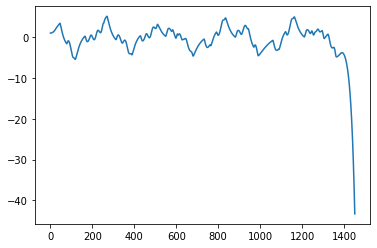

In [27]:
plt.plot(phiv)

In [28]:
phiv=phiv[-3000:]

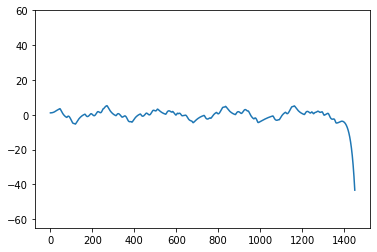

In [29]:
plt.ylim(-65, 60)
plt.plot(phiv)